In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Sugar = pd.read_csv(r"C:\Users\Shrey\Downloads\sugar_consumption_dataset.csv") 

In [3]:
Sugar.head()

,Country,Year,Country_Code,Continent,Region,Population,GDP_Per_Capita,Per_Capita_Sugar_Consumption,Total_Sugar_Consumption,Sugar_From_Sugarcane,...,Obesity_Rate,Sugar_Imports,Sugar_Exports,Avg_Retail_Price_Per_Kg,Gov_Tax,Gov_Subsidies,Education_Campaign,Urbanization_Rate,Climate_Conditions,Sugarcane_Production_Yield
0,France,1972,FRA,Europe,Western Europe,2.617306e+08,8692.631696,12.827741,3.357413e+06,68.422963,...,34.094017,5.401670e+06,2.358929e+06,3.864020,0.0,0,0.0,34.503398,3,52.433972
1,Australia,2003,AUS,Oceania,Australia & New Zealand,1.737965e+08,6859.195960,21.362632,3.712750e+06,55.432564,...,16.040118,3.418790e+06,9.694348e+06,3.282101,0.0,0,0.0,31.783067,4,58.382055
2,Germany,1963,DEU,Europe,Western Europe,1.236366e+08,22075.950575,32.077485,3.965951e+06,86.466120,...,14.405741,8.987281e+06,5.451632e+06,1.097687,0.0,0,0.0,51.551345,1,32.184735
3,France,1965,FRA,Europe,Western Europe,2.989961e+08,3728.027392,47.648930,1.424685e+07,69.806707,...,38.499271,5.179004e+06,8.048500e+06,2.761297,0.0,0,0.0,80.386281,2,84.296019
4,Germany,2010,DEU,Europe,Western Europe,7.341531e+06,40420.973962,23.214343,1.704288e+05,63.772278,...,36.190977,6.463439e+06,7.062910e+06,4.219431,0.0,0,1.0,49.701153,3,66.110815


In [4]:
print(Sugar.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       10000 non-null  object 
 1   Year                          10000 non-null  int64  
 2   Country_Code                  10000 non-null  object 
 3   Continent                     10000 non-null  object 
 4   Region                        10000 non-null  object 
 5   Population                    10000 non-null  float64
 6   GDP_Per_Capita                10000 non-null  float64
 7   Per_Capita_Sugar_Consumption  10000 non-null  float64
 8   Total_Sugar_Consumption       10000 non-null  float64
 9   Sugar_From_Sugarcane          10000 non-null  float64
 10  Sugar_From_Beet               10000 non-null  float64
 11  Sugar_From_HFCS               10000 non-null  float64
 12  Sugar_From_Other              10000 non-null  float64
 13  Pr

In [5]:
Sugar.dropna(inplace=True)

In [6]:
Sugar['Year'] = pd.to_numeric(Sugar['Year'], errors='coerce')

In [7]:
Sugar['Country'] = Sugar['Country'].str.strip()

In [8]:
Sugar = Sugar.drop_duplicates()

In [9]:
Sugar.dropna(inplace=True)

In [10]:
Sugar.reset_index(drop=True, inplace=True)

In [11]:
print(Sugar.head())

     Country  Year Country_Code Continent                   Region  \
0     France  1972          FRA    Europe           Western Europe   
1  Australia  2003          AUS   Oceania  Australia & New Zealand   
2    Germany  1963          DEU    Europe           Western Europe   
3     France  1965          FRA    Europe           Western Europe   
4    Germany  2010          DEU    Europe           Western Europe   

     Population  GDP_Per_Capita  Per_Capita_Sugar_Consumption  \
0  2.617306e+08     8692.631696                     12.827741   
1  1.737965e+08     6859.195960                     21.362632   
2  1.236366e+08    22075.950575                     32.077485   
3  2.989961e+08     3728.027392                     47.648930   
4  7.341531e+06    40420.973962                     23.214343   

   Total_Sugar_Consumption  Sugar_From_Sugarcane  ...  Obesity_Rate  \
0             3.357413e+06             68.422963  ...     34.094017   
1             3.712750e+06             55.4325

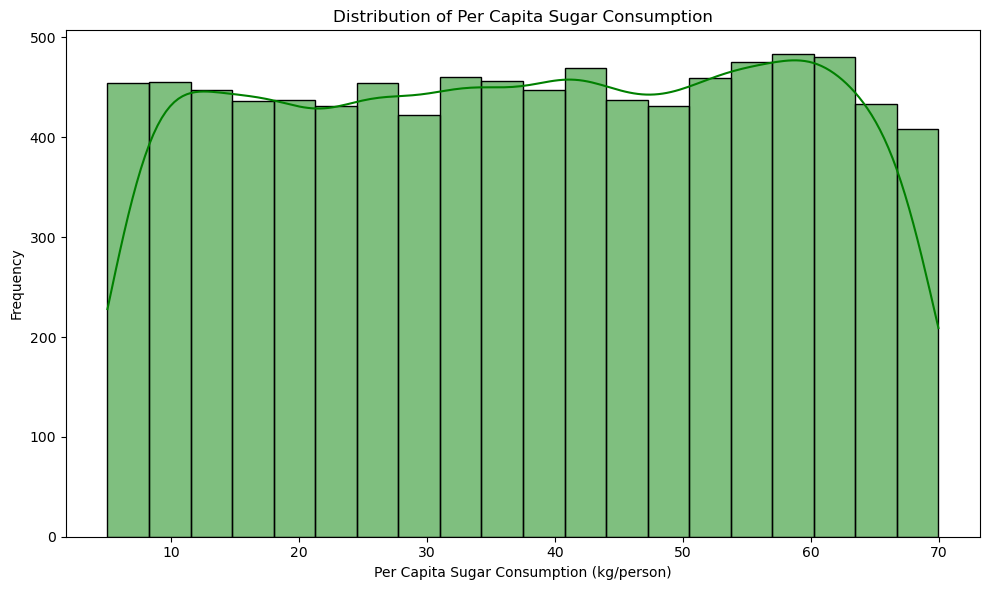

In [12]:
# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(Sugar['Per_Capita_Sugar_Consumption'], bins=20, kde=True, color='green')
plt.title('Distribution of Per Capita Sugar Consumption')
plt.xlabel('Per Capita Sugar Consumption (kg/person)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


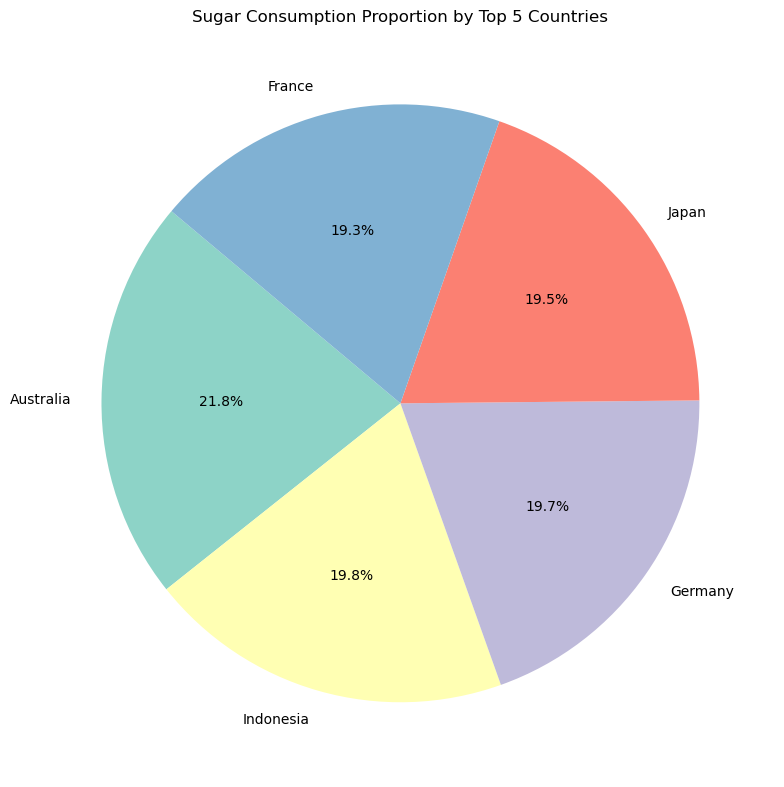

In [13]:
#Pie Chart
top5 = Sugar.groupby('Country')['Total_Sugar_Consumption'].sum().sort_values(ascending=False).head(5)

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(top5.values, labels=top5.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set3"))
plt.title('Sugar Consumption Proportion by Top 5 Countries')
plt.tight_layout()
plt.show()


C:\Users\shrey\AppData\Local\Temp\ipykernel_15168\1024113890.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=Sugar[Sugar['Country'].isin(top_countries_list)],


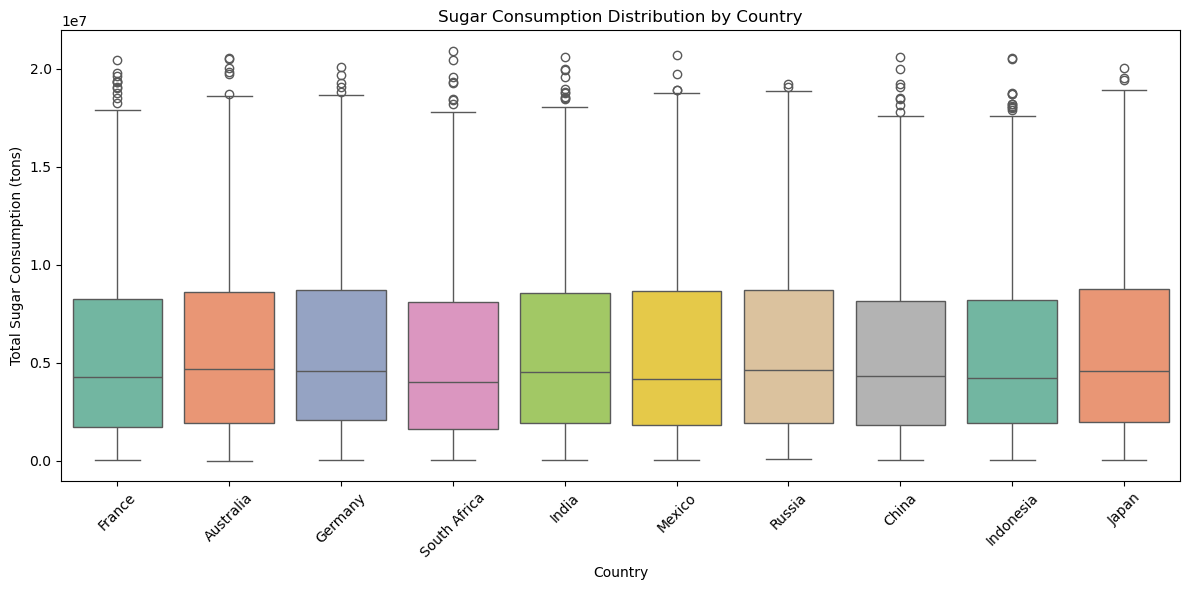

In [14]:
#Box Plot 
top_countries_list = Sugar['Country'].value_counts().head(10).index

# Box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=Sugar[Sugar['Country'].isin(top_countries_list)],
            x='Country',
            y='Total_Sugar_Consumption',
            palette="Set2")
plt.title('Sugar Consumption Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Total Sugar Consumption (tons)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


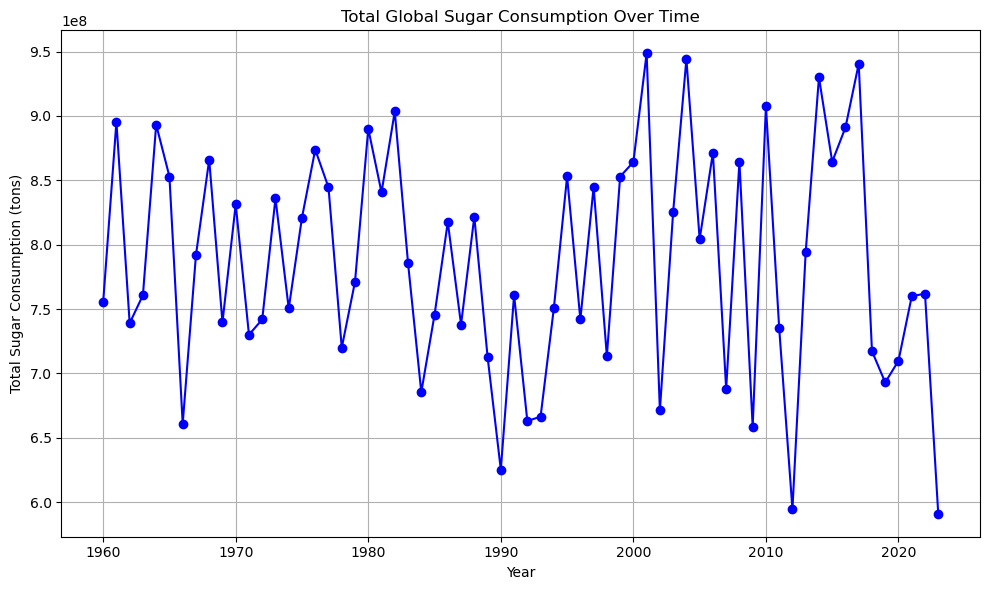

In [15]:
# Line Chart
yearly_consumption = Sugar.groupby('Year')['Total_Sugar_Consumption'].sum()

# Line chart
plt.figure(figsize=(10, 6))
plt.plot(yearly_consumption.index, yearly_consumption.values, marker='o', color='blue')
plt.title('Total Global Sugar Consumption Over Time')
plt.xlabel('Year')
plt.ylabel('Total Sugar Consumption (tons)')
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\shrey\AppData\Local\Temp\ipykernel_15168\3917595721.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette="viridis")


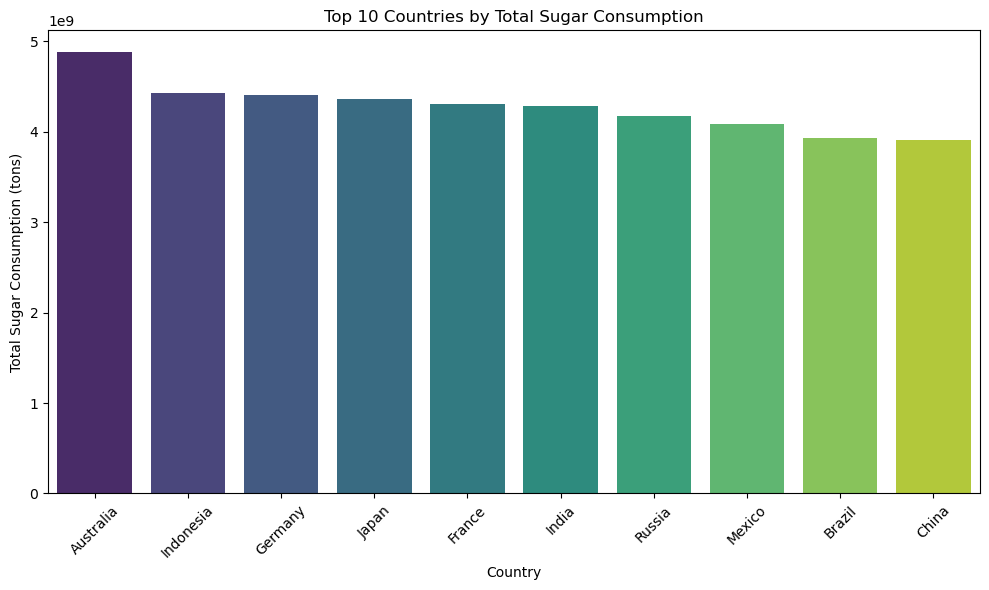

In [16]:
#Barchart
import seaborn as sns
import matplotlib.pyplot as plt

# Group and sort data
top_countries = Sugar.groupby('Country')['Total_Sugar_Consumption'].sum().sort_values(ascending=False).head(10)

# Bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.index, y=top_countries.values, palette="viridis")
plt.title('Top 10 Countries by Total Sugar Consumption')
plt.xlabel('Country')
plt.ylabel('Total Sugar Consumption (tons)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
